In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


In [159]:
train_df = pd.read_csv('/Users/jacobjones/github/datasci207_final_project/data/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Cleaning

In [160]:
#replace nulls with -99
train_df = train_df.fillna(-99)
train_df["LogSalesPrice"] = np.log(train_df.SalePrice)

# Model Building (Model 1)

In [161]:
train = train_df.sample(frac=.7)
val = train_df.drop(train.index)

In [203]:
def show_history(history):
  plt.plot(history.history['loss'], color='black', label='train')
  plt.plot(history.history['val_loss'], color='red', label='val')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

In [163]:
def build_model1():
    #clear session
    tf.keras.backend.clear_session()

    #inputs
    OverallQual = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='OverallQual')
    OverallQual_binned = tf.keras.layers.Discretization(num_bins=10)(OverallQual)
    GrLivArea = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='GrLivArea')

   
    #outputs
    LogSalesPrice = tf.keras.layers.Dense(
      units=1, activation='relu', name='LogSalesPrice')(OverallQual)

    model = tf.keras.Model(inputs=[OverallQual,GrLivArea],
                         outputs=LogSalesPrice,
                         name='HomePriceEstimate')

    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
      loss='MSE')
    

    return model


In [164]:
model = build_model1()
model.summary()

history = model.fit(
  x={
      'OverallQual': train[['OverallQual']],
      'GrLivArea': train[['GrLivArea']]},
  y=train[['LogSalesPrice']],
  epochs=15,
  batch_size=64,
  validation_data=(
      {'OverallQual': train[['OverallQual']],
      'GrLivArea': train[['GrLivArea']]},
      val[['LogSalesPrice']]),
  verbose=1)

show_history(history)

Model: "HomePriceEstimate"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 OverallQual (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 GrLivArea (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 LogSalesPrice (Dense)          (None, 1)            2           ['OverallQual[0][0]']            
                                                                                                  
Total params: 2
Trainable params: 2
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/15
 1/16 [>...

ValueError: Data cardinality is ambiguous:
  x sizes: 1022, 1022
  y sizes: 438
Make sure all arrays contain the same number of samples.

# Model 2

In [ ]:
non_numeric_cols = train_df.columns[train_df.dtypes != 'int64']
train_df.loc(axis=1)[non_numeric_cols]

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalesPrice
0,RL,65.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.247694
1,RL,80.0,Pave,-99,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.109011
2,RL,68.0,Pave,-99,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.317167
3,RL,60.0,Pave,-99,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,-99,-99,-99,WD,Abnorml,11.849398
4,RL,84.0,Pave,-99,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.072541
1456,RL,85.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,-99,MnPrv,-99,WD,Normal,12.254863
1457,RL,66.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,-99,GdPrv,Shed,WD,Normal,12.493130
1458,RL,68.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,-99,-99,-99,WD,Normal,11.864462


In [209]:
numeric_cols_train = train_df.drop(axis=1,labels = non_numeric_cols)

In [210]:
numeric_cols_train.shape

(1460, 35)

In [223]:
def build_model2():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        units=20,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=10,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))

    model.compile(loss='MSE', 
            optimizer='Adam', 
            metrics=['MAE',"MAPE"])
    return model

Epoch 1/1000
19/19 [==============================] - 0s 6ms/step - loss: 38723678208.0000 - MAE: 180354.0469 - MAPE: 99.8623 - val_loss: 39760916480.0000 - val_MAE: 181840.8438 - val_MAPE: 99.7589
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 38617202688.0000 - MAE: 180074.1719 - MAPE: 99.6898 - val_loss: 39634919424.0000 - val_MAE: 181509.6562 - val_MAPE: 99.5563
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 38469103616.0000 - MAE: 179692.6875 - MAPE: 99.4577 - val_loss: 39445073920.0000 - val_MAE: 181008.6719 - val_MAPE: 99.2510
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 38241583104.0000 - MAE: 179092.9844 - MAPE: 99.0922 - val_loss: 39144685568.0000 - val_MAE: 180208.3906 - val_MAPE: 98.7642
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 37882376192.0000 - MAE: 178131.2344 - MAPE: 98.5060 - val_loss: 38665048064.0000 - val_MAE: 178908.4688 - val_MAPE: 97.9736
Epoch 6/10

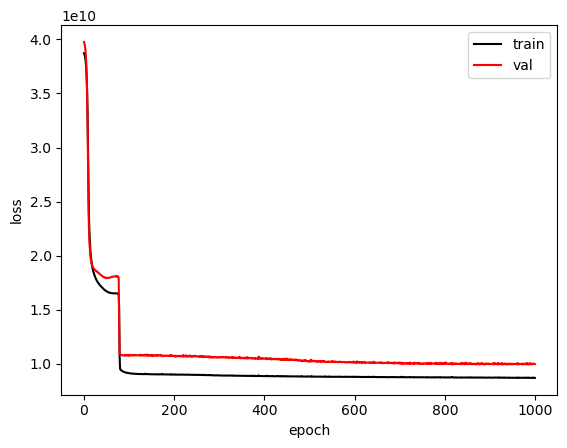

In [224]:
model2 = build_model2()
history = model2.fit(
    x=numeric_cols_train.drop(axis=1,labels="SalePrice"),
    y=numeric_cols_train.SalePrice,
    epochs=1000,
    batch_size=64,
    validation_split=.2,
    verbose=1)
show_history(history)

# Model 3

In [226]:
train_df[non_numeric_cols]

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalesPrice
0,RL,65.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.247694
1,RL,80.0,Pave,-99,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.109011
2,RL,68.0,Pave,-99,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.317167
3,RL,60.0,Pave,-99,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,-99,-99,-99,WD,Abnorml,11.849398
4,RL,84.0,Pave,-99,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.072541
1456,RL,85.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,-99,MnPrv,-99,WD,Normal,12.254863
1457,RL,66.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,-99,GdPrv,Shed,WD,Normal,12.493130
1458,RL,68.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,-99,-99,-99,WD,Normal,11.864462


In [230]:
for col in non_numeric_cols:
    if train_df[col].dtype == 'object':  # Check if the column is of object type (non-numeric)
        if train_df[col].apply(lambda x: isinstance(x, (int, float))).any():  # Check if there are any numeric values
            train_df[col] = train_df[col].astype(str)  # Convert to string if there are numeric values
        label_encoder = LabelEncoder()
        train_df[col] = label_encoder.fit_transform(train_df[col])

In [231]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalesPrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,2,2008,8,4,208500,12.247694
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,5,2007,8,4,181500,12.109011
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,9,2008,8,4,223500,12.317167
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,2,2006,8,0,140000,11.849398
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,12,2008,8,4,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,0,0,0,8,2007,8,4,175000,12.072541
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,3,0,0,2,2010,8,4,210000,12.254863
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,1,3,2500,5,2010,8,4,266500,12.493130
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,0,0,0,4,2010,8,4,142125,11.864462


In [232]:
def train_model3():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        units=20,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=10,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))

    model.compile(loss='MSE', 
            optimizer='Adam', 
            metrics=['MAE',"MAPE"])
    return model

Epoch 1/1000
19/19 [==============================] - 0s 7ms/step - loss: 38562222080.0000 - MAE: 179957.1094 - MAPE: 99.6306 - val_loss: 39520677888.0000 - val_MAE: 181238.4688 - val_MAPE: 99.4043
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 38233350144.0000 - MAE: 179119.2812 - MAPE: 99.1293 - val_loss: 39084560384.0000 - val_MAE: 180110.7969 - val_MAPE: 98.7284
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 37663498240.0000 - MAE: 177655.8906 - MAPE: 98.2568 - val_loss: 38309068800.0000 - val_MAE: 178072.0781 - val_MAPE: 97.5015
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 36637016064.0000 - MAE: 174954.6406 - MAPE: 96.6279 - val_loss: 36871122944.0000 - val_MAE: 174205.3906 - val_MAPE: 95.1751
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 34778206208.0000 - MAE: 169848.8750 - MAPE: 93.5461 - val_loss: 34285146112.0000 - val_MAE: 166925.2812 - val_MAPE: 90.7866
Epoch 6/10

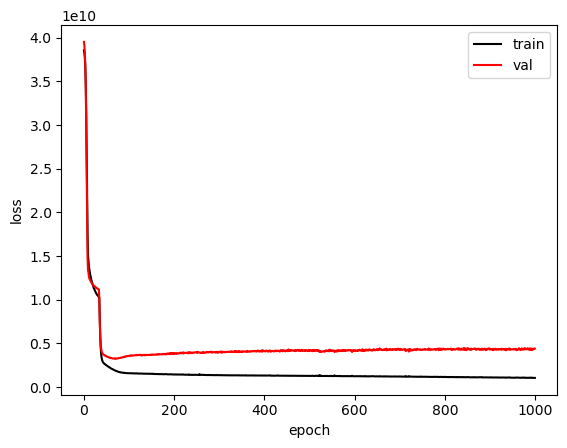

In [239]:
model3 = train_model3()
history = model3.fit(
    x=train_df.drop(axis=1,labels=["SalePrice","LogSalesPrice"]),
    y=train_df.SalePrice,
    epochs=1000,
    batch_size=64,
    validation_split=.2,
    verbose=1)
show_history(history)